In [1]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import os

from numpy import array
from numpy import asarray
from numpy import zeros
from tensorflow import keras
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers import GlobalMaxPooling1D
from keras.layers.embeddings import Embedding
from keras.layers.core import Dense, Dropout
from keras.layers.recurrent import LSTM
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer

from keras.layers.convolutional import Conv1D    
from keras.optimizers import Adam   

In [2]:
reviews = pd.read_csv('Restaurant_Reviews.csv', encoding = "ISO-8859-1")
reviews

,Review,Liked,Catrgory,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,Wow... Loved this place.,1,0,NaN,NaN,NaN,NaN,NaN
1,Crust is not good.,0,2,NaN,NaN,NaN,NaN,NaN
2,Not tasty and the texture was just nasty.,0,2,NaN,NaN,NaN,NaN,NaN
3,Stopped by during the late May bank holiday of...,1,0,NaN,NaN,NaN,NaN,NaN
4,The selection on the menu was great and so wer...,1,0,NaN,NaN,0: General,NaN,NaN
...,...,...,...,...,...,...,...,...
995,I think food should have flavor and texture an...,0,NaN,NaN,NaN,NaN,NaN,NaN
996,Appetite instantly gone.,0,NaN,NaN,NaN,NaN,NaN,NaN
997,Overall I was not impressed and would not go b...,0,NaN,NaN,NaN,NaN,NaN,NaN
998,"The whole experience was underwhelming, and I ...",0,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
reviews = reviews[reviews['Review'] != "#NAME?"]
reviews

,Review,Liked,Catrgory,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,Wow... Loved this place.,1,0,NaN,NaN,NaN,NaN,NaN
1,Crust is not good.,0,2,NaN,NaN,NaN,NaN,NaN
2,Not tasty and the texture was just nasty.,0,2,NaN,NaN,NaN,NaN,NaN
3,Stopped by during the late May bank holiday of...,1,0,NaN,NaN,NaN,NaN,NaN
4,The selection on the menu was great and so wer...,1,0,NaN,NaN,0: General,NaN,NaN
...,...,...,...,...,...,...,...,...
995,I think food should have flavor and texture an...,0,NaN,NaN,NaN,NaN,NaN,NaN
996,Appetite instantly gone.,0,NaN,NaN,NaN,NaN,NaN,NaN
997,Overall I was not impressed and would not go b...,0,NaN,NaN,NaN,NaN,NaN,NaN
998,"The whole experience was underwhelming, and I ...",0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
reviews.isnull().values.any()

True

In [5]:
reviews.shape
reviews.head()

,Review,Liked,Catrgory,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,Wow... Loved this place.,1,0,NaN,NaN,NaN,NaN,NaN
1,Crust is not good.,0,2,NaN,NaN,NaN,NaN,NaN
2,Not tasty and the texture was just nasty.,0,2,NaN,NaN,NaN,NaN,NaN
3,Stopped by during the late May bank holiday of...,1,0,NaN,NaN,NaN,NaN,NaN
4,The selection on the menu was great and so wer...,1,0,NaN,NaN,0: General,NaN,NaN


In [6]:
reviews["Review"][3]

'Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.'

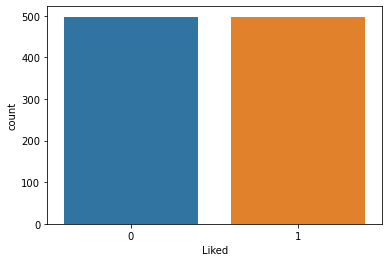

In [7]:
import seaborn as sns
sns.countplot(x='Liked', data=reviews)

In [8]:
def preprocess_text(sen):
    # Removing html tags
    sentence = remove_tags(sen)

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

In [9]:
TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return TAG_RE.sub('', text)

In [10]:
X = []
sentences = list(reviews['Review'])
for sen in sentences:
    X.append(preprocess_text(sen))

In [11]:
X[3]

'Stopped by during the late May bank holiday off Rick Steve recommendation and loved it '

In [12]:
y = reviews['Liked']
y = np.array(list(map(lambda x: 1 if x==1 else 0, y)))

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [14]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

maxlen= max([len(s.split()) for s in X_train])

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [15]:
len(X_train)
X_train

[[181, 737, 359, 209, 2, 482],
 [360, 2, 11, 15],
 [6, 5, 182, 1, 300],
 [738, 7, 739, 12, 95, 89, 58, 9, 361, 2, 362, 163, 68, 483, 68, 181, 13],
 [1, 740, 21, 1, 114, 69, 53, 244],
 [10, 132, 96, 70, 210],
 [211,
  41,
  59,
  741,
  742,
  115,
  9,
  19,
  484,
  42,
  33,
  743,
  485,
  13,
  1,
  744,
  61,
  745,
  58,
  1,
  38,
  6,
  245,
  4,
  363,
  1,
  183],
 [6, 164, 22, 14, 2, 364, 133, 6],
 [33, 28, 22, 746],
 [8, 301, 7, 14],
 [16,
  246,
  31,
  28,
  4,
  747,
  748,
  247,
  4,
  90,
  15,
  146,
  29,
  7,
  14,
  43,
  302,
  1,
  248,
  23,
  123],
 [1,
  365,
  43,
  43,
  366,
  4,
  749,
  103,
  750,
  486,
  751,
  95,
  487,
  19,
  752,
  184,
  13,
  212,
  753,
  11,
  54],
 [1, 114, 71, 53],
 [488, 489],
 [59, 31, 754, 367, 32, 40, 134],
 [8, 28, 303, 32, 490, 104, 2, 249, 38, 1, 10, 3, 72],
 [2, 1, 755, 491, 24, 25, 76, 756, 757, 2, 135, 18, 136, 4, 82],
 [1, 758, 5, 213, 250, 759],
 [185, 492],
 [760, 147, 27, 4, 761, 137, 38],
 [138, 54, 493, 3, 7

In [16]:
# Adding 1 because of reserved 0 index
vocab_size = len(tokenizer.word_index) + 1


X_train = pad_sequences(X_train, padding='post', maxlen=50)
X_test = pad_sequences(X_test, padding='post', maxlen=50)

In [17]:
len(X_train)
X_train

array([[ 181,  737,  359, ...,    0,    0,    0],
       [ 360,    2,   11, ...,    0,    0,    0],
       [   6,    5,  182, ...,    0,    0,    0],
       ...,
       [  10,    3,   25, ...,    0,    0,    0],
       [   8,    3, 1774, ...,    0,    0,    0],
       [  17, 1776,   32, ...,    0,    0,    0]], dtype=int32)

In [18]:
X_test

array([[ 16,  21, 337, ...,   0,   0,   0],
       [  1, 701,   5, ...,   0,   0,   0],
       [347,  18,   0, ...,   0,   0,   0],
       ...,
       [  8,  52, 391, ...,   0,   0,   0],
       [215, 293,   0, ...,   0,   0,   0],
       [  7, 680, 583, ...,   0,   0,   0]], dtype=int32)

In [19]:
embeddings_dictionary = dict()
glove_file = open('glove.6B.50d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [20]:
embedding_matrix = zeros((vocab_size, 50))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [21]:
vocab_size

1777

In [22]:
# Text Classification with Recurrent Neural Network (LSTM)
model = Sequential()
embedding_layer = Embedding(vocab_size, 50, weights=[embedding_matrix], input_length=50 , trainable=False)
model.add(embedding_layer)
model.add(LSTM(128))

model.add(Dense(1, activation='sigmoid'))
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['acc'])

In [23]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 50)            88850     
_________________________________________________________________
lstm (LSTM)                  (None, 128)               91648     
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 180,627
Trainable params: 91,777
Non-trainable params: 88,850
_________________________________________________________________
None


In [24]:
history = model.fit(X_train, y_train, batch_size=128, epochs=20, verbose=1, validation_split=0.2)

score = model.evaluate(X_test, y_test, verbose=1)

Epoch 1/20
5/5 [==============================] - 1s 185ms/step - loss: 0.6928 - acc: 0.5094 - val_loss: 0.6916 - val_acc: 0.4688
Epoch 2/20
5/5 [==============================] - 0s 96ms/step - loss: 0.6901 - acc: 0.5157 - val_loss: 0.6887 - val_acc: 0.5938
Epoch 3/20
5/5 [==============================] - 0s 100ms/step - loss: 0.6920 - acc: 0.5079 - val_loss: 0.6893 - val_acc: 0.5562
Epoch 4/20
5/5 [==============================] - 0s 94ms/step - loss: 0.6830 - acc: 0.5723 - val_loss: 0.6851 - val_acc: 0.5875
Epoch 5/20
5/5 [==============================] - 0s 97ms/step - loss: 0.6643 - acc: 0.6541 - val_loss: 0.6479 - val_acc: 0.6250
Epoch 6/20
5/5 [==============================] - 0s 95ms/step - loss: 0.6413 - acc: 0.6368 - val_loss: 0.6518 - val_acc: 0.6375
Epoch 7/20
5/5 [==============================] - 0s 99ms/step - loss: 0.6014 - acc: 0.7091 - val_loss: 0.6409 - val_acc: 0.6562
Epoch 8/20
5/5 [==============================] - 0s 98ms/step - loss: 0.5700 - acc: 0.7390 - v

In [25]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.5860576033592224
Test Accuracy: 0.7300000190734863


In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [ ]:
#Text Classification with a Convolutional Neural Network
model_CNN = Sequential()

embedding_layer = Embedding(vocab_size, 50, weights=[embedding_matrix], input_length=50 , trainable=False)
model_CNN.add(embedding_layer)

model_CNN.add(Conv1D(128, 5, activation='relu'))
model_CNN.add(GlobalMaxPooling1D())
model_CNN.add(Dense(1, activation='sigmoid'))
model_CNN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [ ]:
print(model_CNN.summary())

In [ ]:
history = model_CNN.fit(X_train, y_train, batch_size=128, epochs=20, verbose=1, validation_split=0.2)
score = model_CNN.evaluate(X_test, y_test, verbose=1)

In [ ]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])